Importing all the necessary Python Libraries for performing Data Analysis.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

Reading the 'csv' file in a variable named 'unfilled_data'.

In [149]:
unfilled_data = pd.read_csv('/content/drive/MyDrive/Rapidious/epi_r.csv', )


In [150]:
unfilled_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
size = unfilled_data.shape
size

(20052, 680)

In [152]:
with open('/content/drive/MyDrive/Rapidious/full_format_recipes.json',"r") as f:
    full_recipe = json.load(f)

len(full_recipe)

20130

Finding all the columns having null values.

In [153]:
all_columns = []

for i in unfilled_data.columns:
  all_columns.append(i)

all_columns = np.array(all_columns)

In [154]:
all_nulls = unfilled_data.isnull().any()

In [155]:
unfilled_data[all_columns[all_nulls]].isnull().sum()

,0
calories,4117
protein,4162
fat,4183
sodium,4119


The above output shows that only 4 columns 'calories', 'protein', 'fat', and 'sodium' contain null values. And the count of the null values in these columns are also mentioned above.

And then in the below cell, the null values are filled with the median of the column and stored in another variable. So ensuring that we can access the null containing dataset if required further.

In [156]:
data = unfilled_data.copy()

for i in ['calories', 'protein', 'fat', 'sodium']:
  data[i] = data[i].fillna(data[i].median())

Here we've removed the outliers from the dataset

In [157]:
q1 = data.iloc[:, 1:].quantile(0.25)
q3 = data.iloc[:, 1:].quantile(0.75)
iqr = q3 - q1

upper_lim = q3 + 1.5 * iqr
lower_lim = q1 - 1.5 * iqr

new_data = data[~((data.iloc[:, 1:] < lower_lim) | (data.iloc[:, 1:] > upper_lim)).any(axis=1)]

In [158]:
nutrition_data = data.iloc[:, 2:6]
nutrition_data

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,331.0,8.0,17.0,294.0
4,547.0,20.0,32.0,452.0
...,...,...,...,...
20047,28.0,2.0,2.0,64.0
20048,671.0,22.0,28.0,583.0
20049,563.0,31.0,38.0,652.0
20050,631.0,45.0,24.0,517.0


Following are all the Scatter Plots which shows the relation between several nutritional variables.

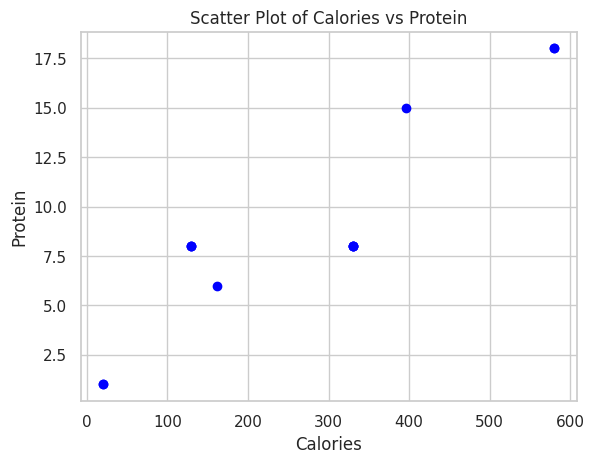

Correlation between calories and protein: 0.9052018851089494


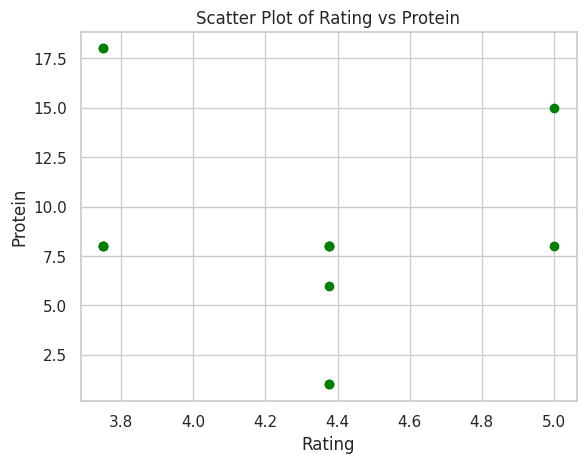

Correlation between rating and protein: -0.22534229084576893


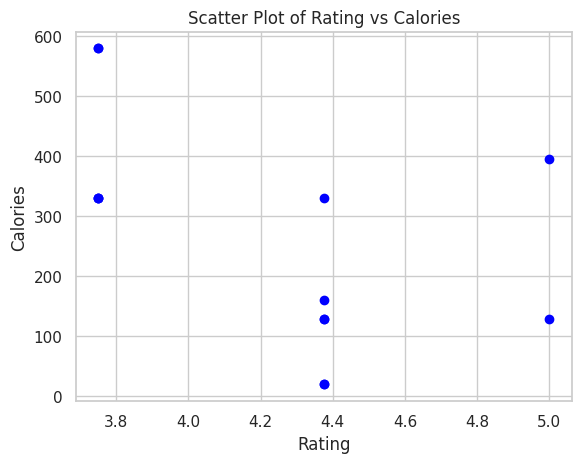

Correlation between rating and calories: -0.5089161366162072


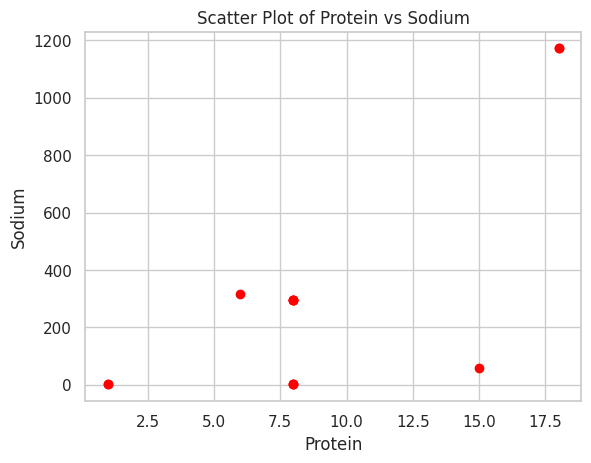

Correlation between protein and sodium: 0.7562121094880638


In [159]:
# Scatter plot for Calorie vs Protein
plt.scatter(new_data['calories'], new_data['protein'], color = 'blue')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Scatter Plot of Calories vs Protein')
plt.show()

correlation = new_data['calories'].corr(new_data['protein'])
print(f"Correlation between calories and protein: {correlation}")


# Scatter plot for Rating vs Protein
plt.scatter(new_data['rating'], new_data['protein'], color = 'green')
plt.xlabel('Rating')
plt.ylabel('Protein')
plt.title('Scatter Plot of Rating vs Protein')
plt.show()

correlation = new_data['rating'].corr(new_data['protein'])
print(f"Correlation between rating and protein: {correlation}")


# Scatter plot for Rating vs Calories
plt.scatter(new_data['rating'], new_data['calories'], color='blue')
plt.xlabel('Rating')
plt.ylabel('Calories')
plt.title('Scatter Plot of Rating vs Calories')
plt.show()

correlation = new_data['rating'].corr(new_data['calories'])
print(f"Correlation between rating and calories: {correlation}")


# Scatter plot for Protein vs Sodium
plt.scatter(new_data['protein'], new_data['sodium'], color='red')
plt.xlabel('Protein')
plt.ylabel('Sodium')
plt.title('Scatter Plot of Protein vs Sodium')
plt.show()

correlation = new_data['protein'].corr(new_data['sodium'])
print(f"Correlation between protein and sodium: {correlation}")


Here, it shows the correlation between all the nutritional variables. We can see a high positive correlation between 'protein' and 'calories'. Also, we see a high positive correlation between 'sodium' and 'calories'. This also gives an inference about increasing risk of heart-disease in some food which can add-up with calories.

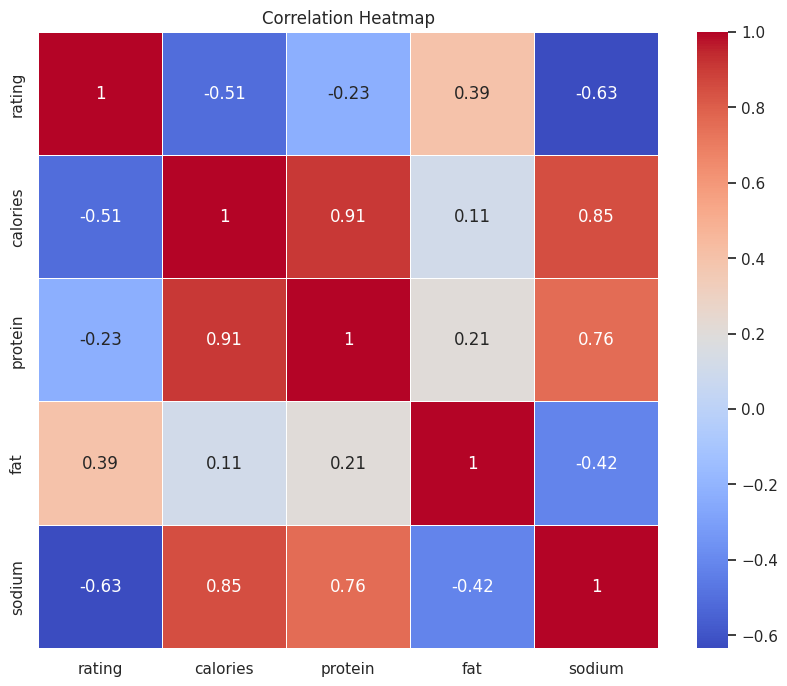

In [160]:
numeric_columns = ['rating', 'calories', 'protein', 'fat', 'sodium']

plt.figure(figsize=(10, 8))
corr_matrix = new_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1400x800 with 0 Axes>

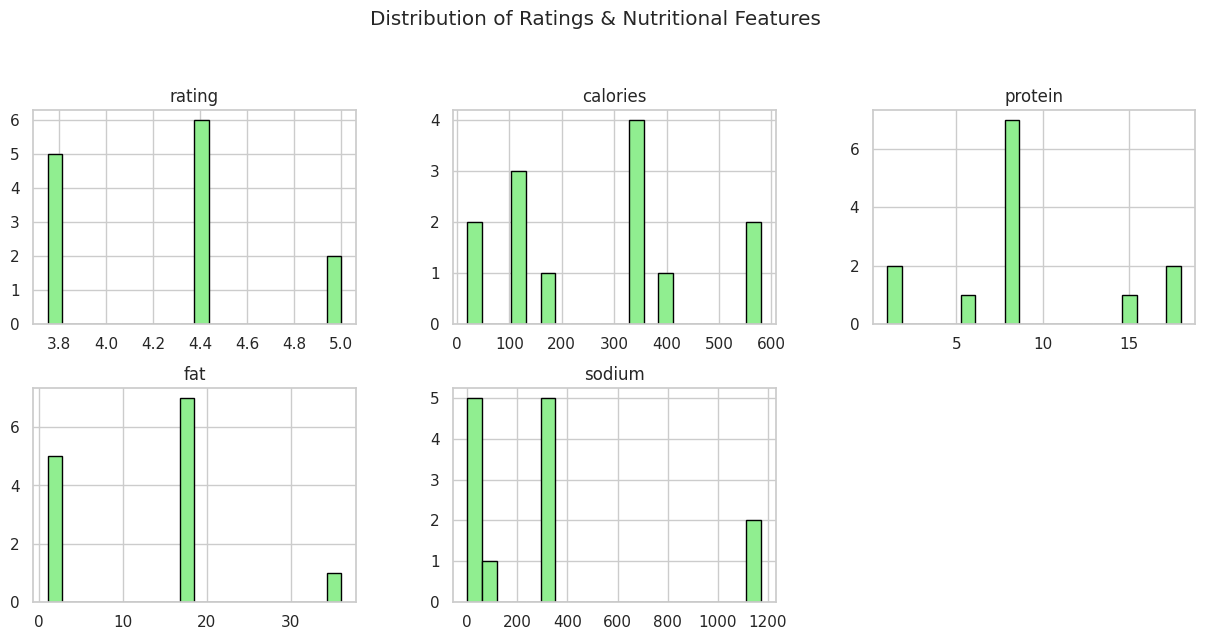

In [161]:
plt.figure(figsize=(14, 8))
new_data[numeric_columns].hist(bins=20, figsize=(15, 10), layout=(3, 3), color='lightgreen', edgecolor='black')
plt.suptitle('Distribution of Ratings & Nutritional Features')
plt.show()

In [162]:
highest_rating_rows = nutrition_data[data['rating'] == data['rating'].max()]

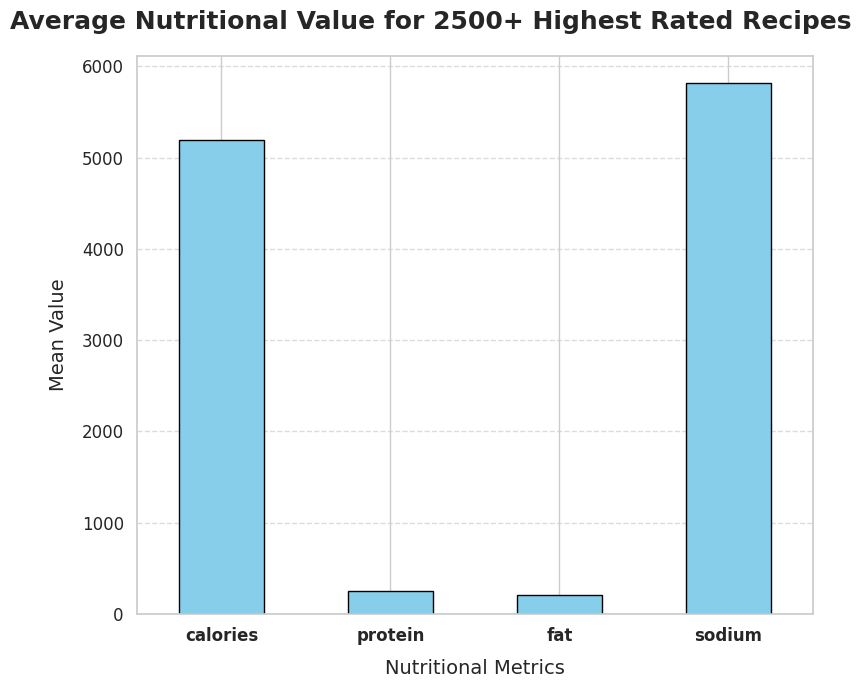

In [163]:
mean_values = highest_rating_rows.mean()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 7))

mean_values.plot(kind='bar', color='skyblue', edgecolor='black')

plt.suptitle('Average Nutritional Value for 2500+ Highest Rated Recipes', fontsize=18, weight='bold')
plt.xlabel('Nutritional Metrics', fontsize=14, labelpad=10)
plt.ylabel('Mean Value', fontsize=14, labelpad=10)

plt.xticks(rotation=0, fontsize=12, weight='bold')

plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [164]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]

countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola",
    "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh",
    "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan",
    "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil",
    "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde",
    "Cambodia", "Cameroon", "Canada", "Central African Republic",
    "Chad", "Chile", "China", "Colombia", "Comoros", "Costa Rica",
    "Croatia", "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo",
    "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador",
    "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon",
    "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada",
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti",
    "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran",
    "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan",
    "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait",
    "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg",
    "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro",
    "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru",
    "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger",
    "Nigeria", "North Korea", "North Macedonia", "Norway", "Oman",
    "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea",
    "Paraguay", "Peru", "Philippines", "Poland", "Portugal",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa",
    "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia",
    "Slovenia", "Solomon Islands", "Somalia", "South Africa",
    "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan",
    "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan",
    "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo",
    "Tonga", "Trinidad and Tobago", "Tunisia", "Turkiye",
    "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan",
    "Vanuatu", "Vatican City", "Venezuela", "Vietnam", "Yemen",
    "Zambia", "Zimbabwe"
]

us_states = np.char.lower(np.array(us_states))
countries = np.char.lower(np.array(countries))


In [165]:
us_states_list = data.columns[data.columns.isin(us_states)]
us_states_data = data[us_states_list]

countries_list = data.columns[data.columns.isin(countries)]
countries_data = data[countries_list]

us_states_rated_5 = us_states_data[data['rating'] == data['rating'].max()].sum()
highest_rated_us_state = us_states_rated_5[us_states_rated_5 == us_states_rated_5.max()]

countries_rated_5 = countries_data[data['rating'] == data['rating'].max()].sum()
highest_rated_country = countries_rated_5[countries_rated_5 == countries_rated_5.max()]

print(f'1. Highest rated US-state for food-recipes is "{highest_rated_us_state.index[0].capitalize()}"')
print(f'2. Highest rated Country for food-recipes is "{highest_rated_country.index[0].capitalize()}"')

1. Highest rated US-state for food-recipes is "California"
2. Highest rated Country for food-recipes is "Ireland"


Highest-rated US-State & Country

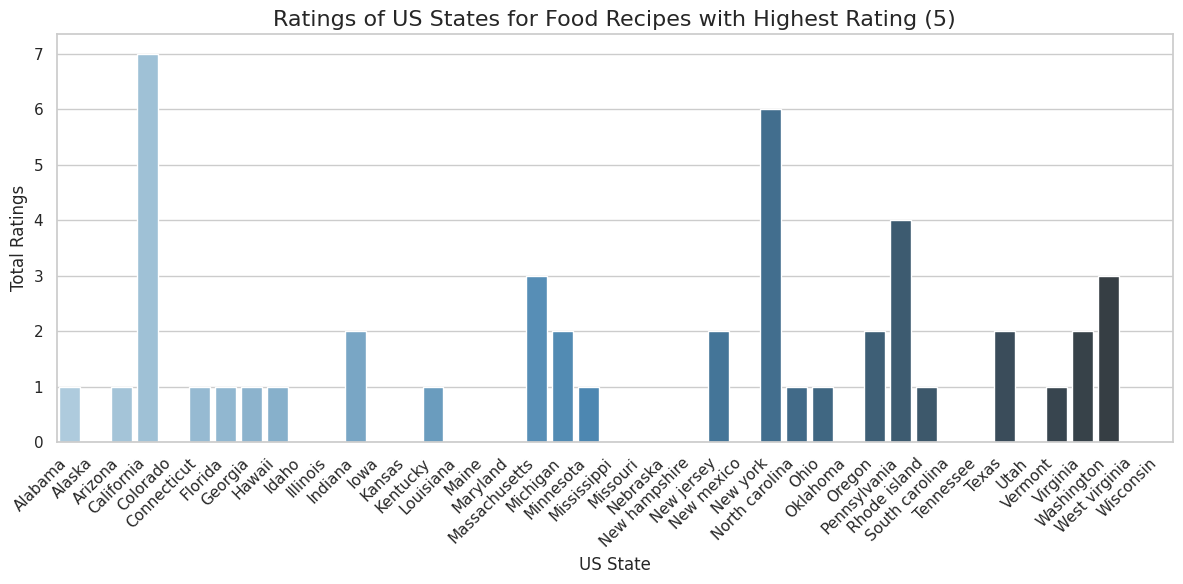

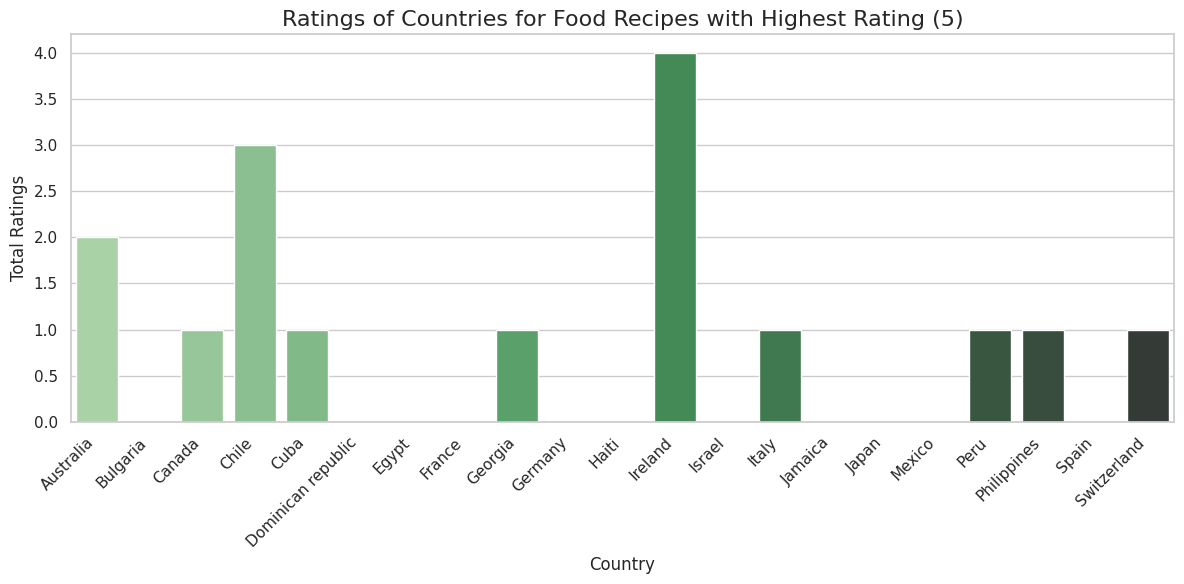

In [166]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=us_states_rated_5.index.str.capitalize(), y=us_states_rated_5.values, palette='Blues_d')
plt.title('Ratings of US States for Food Recipes with Highest Rating (5)', fontsize=16)
plt.xlabel('US State', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print()

plt.figure(figsize=(12, 6))
sns.barplot(x=countries_rated_5.index.str.capitalize(), y=countries_rated_5.values, palette='Greens_d')
plt.title('Ratings of Countries for Food Recipes with Highest Rating (5)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [167]:
ingredients = ['almond', 'anchovy', 'apple', 'apple juice', 'apricot', 'artichoke', 'arugula', 'asian pear',
               'asparagus', 'avocado', 'bacon', 'banana', 'barley', 'basil', 'bass', 'bean', 'beef', 'beef rib',
               'beef shank', 'beef tenderloin', 'beet', 'bell pepper', 'berry', 'biscuit', 'blackberry',
               'blue cheese', 'blueberry', 'bok choy', 'bran', 'breadcrumbs', 'brie', 'brisket', 'broccoli',
               'broccoli rabe', 'brown rice', 'brussel sprout', 'bulgur', 'butter', 'buttermilk', 'butternut squash',
               'butterscotch/caramel', 'cabbage', 'cantaloupe', 'capers', 'carrot', 'cashew', 'cauliflower', 'caviar',
                'celery', 'chard', 'cheddar', 'cheese', 'cherry', 'chestnut', 'chicken', 'chickpea', 'chile pepper',
                'chive', 'chocolate', 'cilantro', 'citrus', 'clam', 'coconut', 'cod', 'coffee', 'collard greens',
                'corn', 'cornmeal', 'cottage cheese', 'couscous', 'crab', 'cranberry', 'cranberry sauce',
                'cream cheese', 'créme de cacao', 'cucumber', 'currant', 'date', 'dill', 'dried fruit', 'duck', 'egg',
                'eggplant', 'endive', 'escarole', 'fennel', 'feta', 'fig', 'fish', 'fontina', 'garlic','goat cheese',
                'goose', 'gouda', 'granola', 'grape', 'grapefruit', 'green bean', 'green onion/scallion',
                'ground beef', 'ground lamb', 'guava', 'halibut', 'ham', 'hamburger', 'hazelnut', 'honey', 'honeydew',
                'horseradish', 'hot pepper', 'hummus', 'jalapeño', 'jam or jelly', 'jerusalem artichoke', 'jícama',
                'kale', 'kirsch', 'kiwi', 'lamb', 'lamb chop', 'lamb shank', 'leek', 'legume', 'lemon',
                'lemon juice', 'lemongrass', 'lentil', 'lettuce', 'lima bean', 'lime', 'lime juice', 'lingonberry',
                'lobster', 'lychee', 'macadamia nut', 'mango', 'maple syrup', 'marscarpone', 'marshmallow', 'meat',
                'meatball', 'meatloaf', 'melon', 'milk/cream', 'mint', 'molasses', 'monterey jack', 'mozzarella',
                'mushroom', 'mussel', 'mustard', 'mustard greens', 'nectarine', 'noodle', 'nut', 'oat', 'oatmeal',
                'octopus', 'okra', 'olive', 'onion', 'orange', 'orange juice', 'orzo', 'oyster', 'papaya', 'parmesan',
                'parsley', 'parsnip', 'passion fruit', 'pasta', 'pea', 'peach', 'peanut', 'peanut butter', 'pear',
                'pecan', 'pepper', 'persimmon', 'phyllo/puff pastry dough', 'pickles', 'pine nut', 'pineapple',
                'pistachio', 'plantain', 'plum', 'poblano', 'pomegranate', 'pomegranate juice', 'pork', 'pork chop',
                'pork rib', 'pork tenderloin', 'potato', 'poultry', 'poultry sausage', 'prosciutto', 'pumpkin',
                'quail', 'quince', 'quinoa', 'rack of lamb', 'radicchio', 'radish', 'raisin', 'raspberry', 'rhubarb',
                'rice', 'ricotta', 'rutabaga', 'rye', 'salmon', 'sausage', 'scallop', 'seafood', 'semolina',
                'sesame', 'sesame oil', 'shallot', 'shellfish', 'shrimp', 'sour cream', 'soy', 'soy sauce', 'spinach',
                'squash', 'squid', 'steak', 'stock', 'strawberry', 'sugar snap pea', 'sweet potato/yam', 'swiss cheese',
                'swordfish', 'tangerine', 'tapioca', 'tarragon', 'tilapia', 'tofu', 'tomatillo', 'tomato', 'tree nut',
                'tropical fruit', 'trout', 'tuna', 'turnip', 'veal', 'venison', 'vinegar', 'walnut', 'watercress',
                'watermelon', 'whole wheat', 'wild rice', 'yellow squash', 'yogurt', 'yuca', 'zucchini', 'turkey']

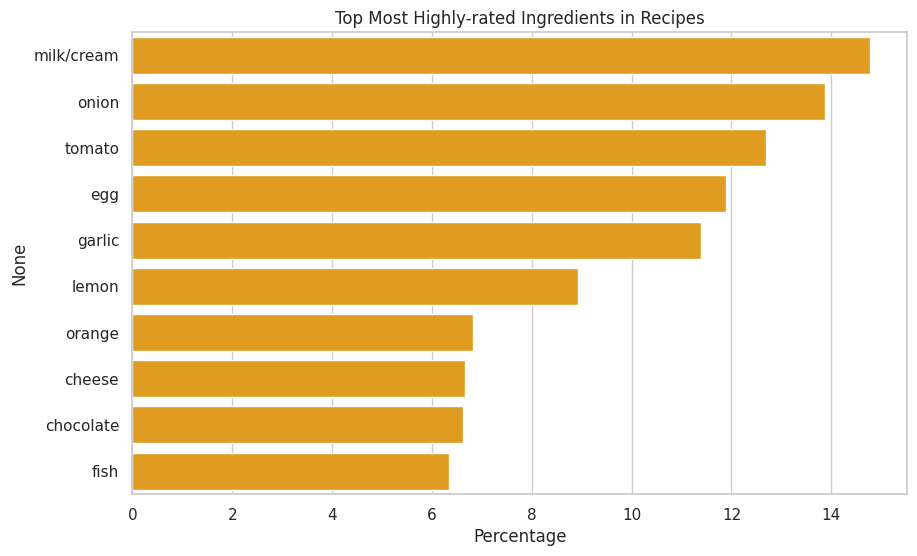

In [168]:
high_rated = data[data['rating'] == data['rating'].max()]
top_ingredients = high_rated[ingredients].sum().sort_values(ascending=False).head(10)
top_ingredients = (top_ingredients / top_ingredients.sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index, color = 'orange')
plt.title('Top Most Highly-rated Ingredients in Recipes')
plt.xlabel('Percentage')
plt.show()

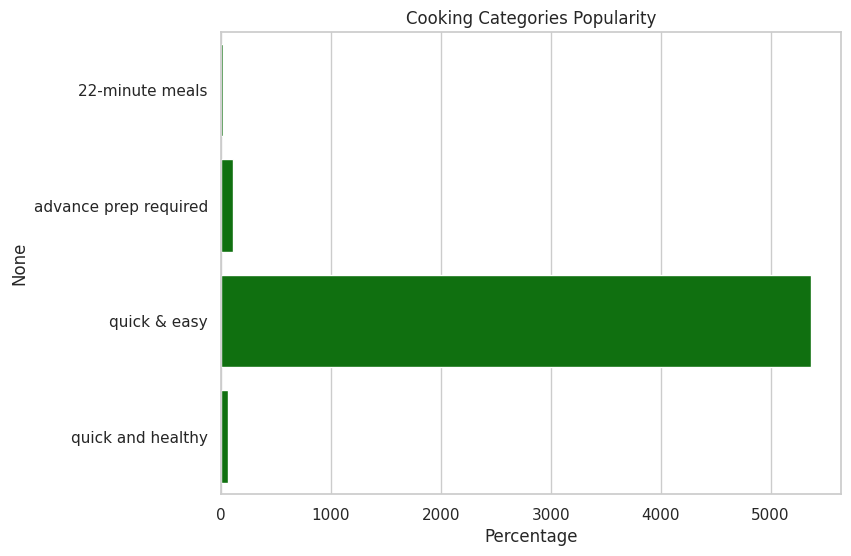

In [169]:
cooking_category = ["22-minute meals","advance prep required","quick & easy","quick and healthy"]
cooking_category_count = data[cooking_category].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=cooking_category_count.values, y=cooking_category_count.index, color = "green")
plt.title('Cooking Categories Popularity')
plt.xlabel('Percentage')
plt.show()

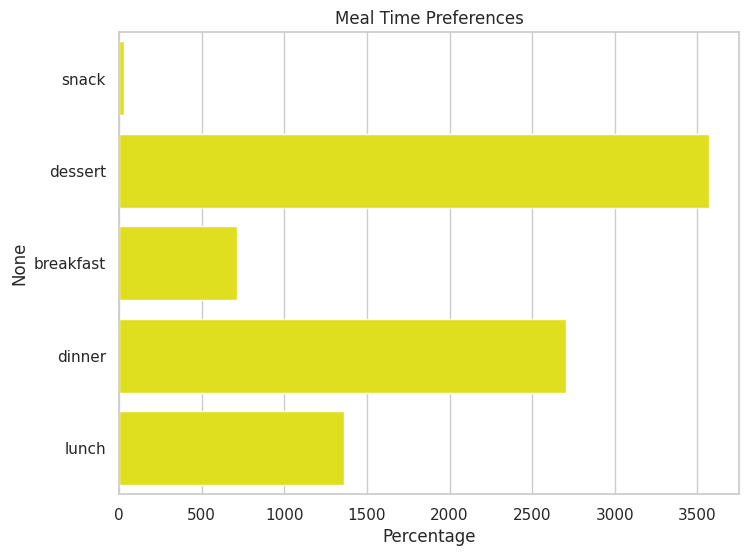

In [170]:
meal_time = ["snack","dessert", "breakfast","dinner", "lunch"]
meal_time_total = data[meal_time].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=meal_time_total.values, y=meal_time_total.index, color = "yellow")
plt.title('Meal Time Preferences')
plt.xlabel('Percentage')
plt.show()

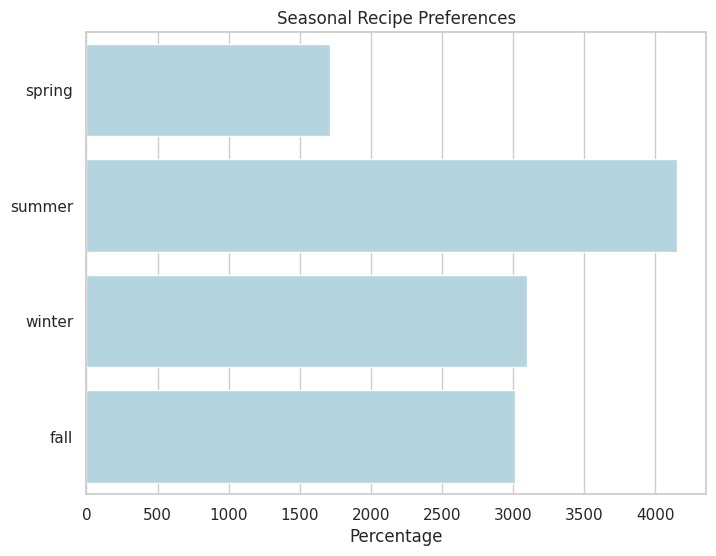

In [171]:
season = ["spring","summer","winter","fall"]
seasons_total = data[season].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=seasons_total.values, y=season, color = "lightblue")
plt.title('Seasonal Recipe Preferences')
plt.xlabel('Percentage')
plt.show()

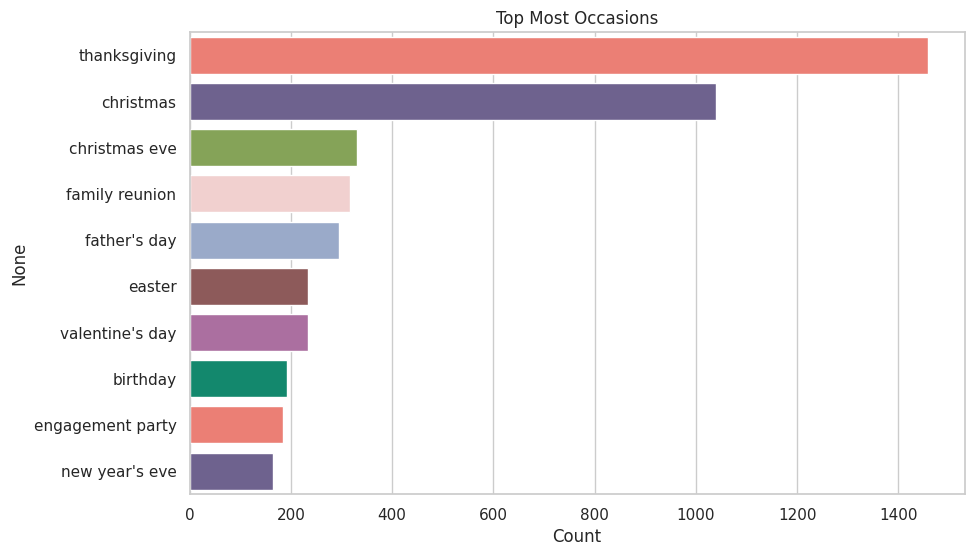

In [172]:
occasions = ["anniversary", "birthday", "christmas", "christmas eve", "easter", "father's day", "halloween",
             "lunar new year", "mother's day", "new year's day", "new year's eve", "persian new year", "thanksgiving",
             "valentine's day","diwali", "engagement party", "family reunion", "hanukkah", "persian new year",
             "st. patrick's day", "wedding"]

top_occasions = data[occasions].sum().sort_values(ascending=False).head(10)
custom_palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251", "#B565A7", "#009B77"]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_occasions.values, y=top_occasions.index, palette = custom_palette)
plt.title('Top Most Occasions')
plt.xlabel('Count')
plt.show()